#### Import required libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline 

#### Import the train set

In [2]:
train = pd.read_csv(r"C:\Users\ADMIN\Downloads\train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Exploratory Data Analysis

In [3]:
#Shape of data showing number of rows and columns
train.shape

(614, 13)

In [4]:
#Basic information about the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Summary statistics 
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


[Text(0, 0, '422'), Text(0, 0, '192')]

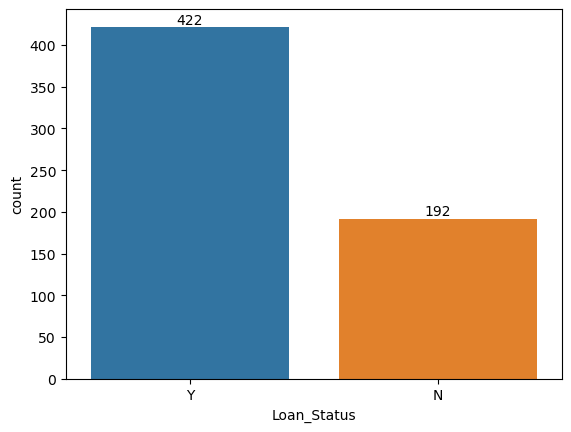

In [6]:
#Univariate analysis of Loan_Status variable
ax = sns.countplot(x='Loan_Status',data = train)
ax.bar_label(ax.containers[0])

In [7]:
#Check for missing values
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Preprocessing

In [8]:
# Handling missing values using Imputation

train['Gender'] = train['Gender'].fillna(train['Gender'].mode().iloc[0])
train['Married'] = train['Married'].fillna(train['Married'].mode().iloc[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode().iloc[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode().iloc[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [9]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#Encoding

train = pd.get_dummies(train,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],drop_first=True)

train['Loan_Status'] = train['Loan_Status'].map({'Y':1,'N':0})

In [11]:
#Drop unnecessary columns
trained = train.drop(['Loan_ID'],axis=1)

#### Load the test dataset

In [12]:
test = pd.read_csv(r"C:\Users\ADMIN\Downloads\test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Preprocessing

In [13]:
# Handling missing values using Imputation

test['Gender'] = test['Gender'].fillna(test['Gender'].mode().iloc[0])
test['Married'] = test['Married'].fillna(test['Married'].mode().iloc[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode().iloc[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode().iloc[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [14]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
#Encoding

test = pd.get_dummies(test,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],drop_first=True)

In [16]:
#Remove unnecessary columns
tested = test.drop(['Loan_ID'],axis=1)

#### Creating Feature and Target variables

In [17]:
X_train = trained.drop(['Loan_Status'],axis=1)
y_train = trained['Loan_Status']
X_test = tested

In [19]:
model = RandomForestClassifier()
rf = model.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [20]:
rf_pred = pd.DataFrame(rf_pred)

In [21]:
test['Loan_Status'] = rf_pred
sample_submission = test[['Loan_ID','Loan_Status']]

In [22]:
sample_submission['Loan_Status'] = sample_submission.iloc[:,1].map({1:'Y',0:'N'})
sample_submission

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2924\2980673802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_submission['Loan_Status'] = sample_submission.iloc[:,1].map({1:'Y',0:'N'})


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [24]:
rf_pred = sample_submission.to_csv(r"C:\Users\ADMIN\Downloads\loan-randomforest.csv",index=False)